데이터 로드

In [11]:
import pandas as pd

ss = pd.read_csv("D:/_data/stock predict/삼성전자.csv", thousands=',', encoding='CP949')
ss = ss.drop(range(20, 1120), axis=0)
ki = pd.read_csv("D:/_data/stock predict/키움증권.csv", thousands=',', encoding='CP949')
ki = ki.drop(range(20, 1060), axis=0)

ss

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,76800,78000,76800,78000,▲,200,0.26,11802494.0,914987.0,0.00,-733323,-907696,0,-257019,757837,51.78
1,2021/12/16,78500,78500,77400,77800,▲,200,0.26,11996128.0,934244.0,0.13,-442445,-261746,-105777,571543,822030,51.78
2,2021/12/15,76400,77600,76300,77600,▲,600,0.78,9584939.0,738592.0,0.14,-1118059,-654764,1095947,1946258,1706254,51.79
3,2021/12/14,76500,77200,76200,77000,▲,200,0.26,10976660.0,841447.0,0.14,198293,-1487295,1005909,804186,-132070,51.77
4,2021/12/13,77200,78300,76500,76800,▼,-100,-0.13,15038750.0,1163285.0,0.13,-181359,184966,-151301,-1388477,-606534,51.75
5,2021/12/10,77400,77600,76800,76900,▼,-1300,-1.66,9155219.0,705966.0,0.13,1797829,-1071153,-728679,-505955,-1714088,51.75
6,2021/12/09,77400,78200,77000,78200,▲,800,1.03,21604528.0,1681184.0,0.14,-1671678,-491078,2768853,2796574,3486578,51.77
7,2021/12/08,78300,78600,77100,77400,,0,0.00,21558340.0,1662979.0,0.14,-2524520,2586682,703379,-941476,48232,51.72
8,2021/12/07,76100,77700,75600,77400,▲,1100,1.44,19232453.0,1477888.0,0.14,-2997907,-547244,4216958,3518986,123462,51.71
9,2021/12/06,75100,76700,74900,76300,▲,700,0.93,16391250.0,1245309.0,0.14,-3062604,576498,2508191,2146417,2070776,51.64


데이터 전처리

In [2]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# 인덱스 재배열
ss = ss.loc[::-1].reset_index(drop=True)
ki = ki.loc[::-1].reset_index(drop=True)

ki

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/11/22,106000,109000,105000,109000,▲,3500,3.32,89564,9563,0.93,-13426,-10878,24865,23544,24075,25.61
1,2021/11/23,107500,107500,105500,107500,▼,-1500,-1.38,57672,6143,0.94,11818,-13417,-1065,1528,-8687,25.61
2,2021/11/24,107000,107000,105000,105000,▼,-2500,-2.33,62724,6620,0.93,26965,-8031,-26006,-17199,-20042,25.51
3,2021/11/25,105000,106500,104000,105500,▲,500,0.48,38215,4026,0.94,-7183,3216,10319,1666,-3350,25.55
4,2021/11/26,104500,106000,102000,103000,▼,-2500,-2.37,77033,7991,0.96,14505,5517,-26186,-15546,-25613,25.45
5,2021/11/29,100000,104000,100000,102500,▼,-500,-0.49,78470,8007,0.95,-21785,9951,10834,1718,-192,25.49
6,2021/11/30,102500,103000,96000,97500,▼,-5000,-4.88,169524,16764,0.93,62687,-27749,-59027,-43107,-47586,25.27
7,2021/12/01,97000,99800,96600,99600,▲,2100,2.15,79903,7875,0.91,-18847,4984,8628,8973,9911,25.30
8,2021/12/02,98100,104000,98100,103500,▲,3900,3.92,75890,7705,0.94,-38201,11298,13384,10192,26511,25.35
9,2021/12/03,102500,106000,102000,105500,▲,2000,1.93,65729,6890,0.92,-21284,13087,7616,669,3073,25.38


In [13]:
# 필요한 컬럼만 남겨두기
x_ss = ss.drop(['일자', '전일비', 'Unnamed: 6', '등락률', '거래량', '금액(백만)', 
                '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis =1)
x_ss = np.array(x_ss)
x_ki = ki.drop(['일자', '전일비', 'Unnamed: 6', '등락률', '거래량', '금액(백만)',
                '신용비',  '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis =1)
x_ki = np.array(x_ki)


# '일자', '시가', '고가', '저가', '종가', '전일비', 'Unnamed: 6', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'

x_ss.shape

(20, 4)

In [5]:
# split 함수 정의
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column-1
        
        if y_end_number > len(dataset):
            break
        tmp_x = dataset[i:x_end_number, 1:]
        tmp_y = dataset[x_end_number-1:y_end_number, 0]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x_ssp, y_ssp = split_xy(x_ss, 3, 4)
x_kip, y_kip = split_xy(x_ki, 3, 4)

x_ssp.shape, y_ssp.shape

((15, 3, 3), (15, 4))

In [6]:
# 삼성 데이터 train_test_split 적용
x1_train, x1_test, y1_train, y1_test = train_test_split(x_ssp, y_ssp, train_size=0.8, random_state=66)

# 키움 데이터 train_test_split 적용
x2_train, x2_test, y2_train, y2_test = train_test_split(x_kip, y_kip, train_size=0.8, random_state=66)

모델 구성

In [7]:
#삼성 input
input1 = Input(shape=(3, 3))
dense1_1 = LSTM(32, activation='relu')(input1)
dense1_2 = Dense(16, activation='relu')(dense1_1)
output1 = Dense(4, activation='relu')(dense1_2)

#키움 input
input2 = Input(shape=(3, 3))
dense2_1 = LSTM(32, activation='relu')(input2)
dense2_2 = Dense(16, activation='relu')(dense2_1)
output2 = Dense(4, activation='relu')(dense2_2)

#앙상블
from tensorflow.keras.layers import concatenate
merge1 = concatenate([output1, output2])

#삼성 out
output1_1 = Dense(16, activation='relu')(merge1)
output1_2 = Dense(8)(output1_1)
ss_output = Dense(4)(output1_2)

#키움 out
output2_1 = Dense(16, activation='relu')(merge1)
output2_2 = Dense(8)(output2_1)
ku_output = Dense(4)(output2_2)

model = Model(inputs=[input1, input2], outputs=[ss_output, ku_output])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 3)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3, 3)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           4608        input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           4608        input_2[0][0]                    
______________________________________________________________________________________________

컴파일 & 훈련

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='auto', patience=30, restore_best_weights=True)
hist = model.fit([x1_train,x2_train], [y1_train, y2_train], epochs=1000, batch_size=1,
                 validation_split=0.3, callbacks=[es])

Epoch 1/1000
8/8 [==============================] - 1s 38ms/step - loss: 4357.3975 - dense_6_loss: 1891.7522 - dense_9_loss: 2465.6453 - val_loss: 4023.1553 - val_dense_6_loss: 1456.1460 - val_dense_9_loss: 2567.0093
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 4601.2871 - dense_6_loss: 1586.9705 - dense_9_loss: 3014.3167 - val_loss: 5934.2891 - val_dense_6_loss: 2209.5703 - val_dense_9_loss: 3724.7188
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 4102.1055 - dense_6_loss: 1611.4480 - dense_9_loss: 2490.6572 - val_loss: 3737.1011 - val_dense_6_loss: 1404.3491 - val_dense_9_loss: 2332.7520
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 3579.6687 - dense_6_loss: 1370.5181 - dense_9_loss: 2209.1506 - val_loss: 5449.8799 - val_dense_6_loss: 1844.5010 - val_dense_9_loss: 3605.3789
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 3489.2712 - dense_6_loss: 1402.4360 - dense_9_loss: 2086.8352 -

평가

In [135]:
loss = model.evaluate([x1_test, x2_test], [y1_test, y2_test])
print('loss : ', loss)

1/1 [==============================] - 0s 240ms/step - loss: 3621.9617 - dense_56_loss: 1505.4069 - dense_59_loss: 2116.5547
loss :  [3621.961669921875, 1505.4068603515625, 2116.5546875]


In [139]:
model.save("../_save/stock_wed_mp_(776, 1064).h5")

예측

In [137]:
x_samsung = x_ss[17:20,:3].reshape(1, 3, 3)
x_kiwoom = x_ki[17:20,:3].reshape(1, 3, 3)

In [138]:
ss_pred, ki_pred = model.predict([x_samsung, x_kiwoom])
samsung = ss_pred[-1][-1]
kiwoom = ki_pred[-1][-1]

print('예측값 : ', samsung, kiwoom)

예측값 :  77645.86 106485.52


데이터 시각화

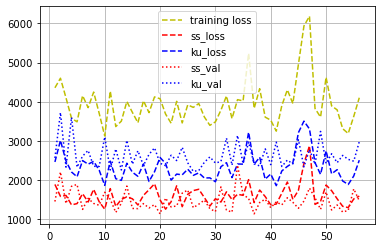

In [14]:
loss = hist.history["loss"]
ss_loss = hist.history["dense_6_loss"]
ku_loss = hist.history["dense_9_loss"]
ss_val = hist.history["val_dense_6_loss"]
ku_val = hist.history["val_dense_9_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'y--', label="training loss")
plt.plot(epochs, ss_loss, 'r--', label="ss_loss")
plt.plot(epochs, ku_loss, 'b--', label="ku_loss")
plt.plot(epochs, ss_val, 'r:', label="ss_val")
plt.plot(epochs, ku_val, 'b:', label="ku_val")

plt.grid()
plt.legend()
plt.show()

데이터 로드

In [94]:
model = load_model('D:\Study\_save\stock_wed_mp_1.h5')

loss = model.evaluate([x1_test, x2_test], [y1_test, y2_test])
print('loss : ', loss)

x_samsung = x_ss[17:20,:3].reshape(1, 3, 3)
x_kiwoom = x_ki[17:20,:3].reshape(1, 3, 3)

ss_pred, ki_pred = model.predict([x_samsung, x_kiwoom])
samsung = ss_pred[-1][-1]
kiwoom = ki_pred[-1][-1]

print('예측값 : ', samsung, kiwoom)


1/1 [==============================] - 0s 230ms/step - loss: 5123.9336 - dense_46_loss: 2394.8074 - dense_49_loss: 2729.1262
loss :  [5123.93359375, 2394.807373046875, 2729.126220703125]
예측값 :  91853.64 135068.56
